# Import

In [1]:
# #.py modules
# import acquire as ac
# import prepare as p
# import explore as ex
# import evaluate as ev
import wrangle as w

#standard
import pandas as pd
import numpy as np
import re

#scraping
import requests
from requests import get
from bs4 import BeautifulSoup

#file
import os
import json
from google.oauth2 import service_account
import pandas_gbq

#vizz
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#preprocess
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#split and model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#set random state
random_state=123

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

imports loaded successfully, awaiting commands...


In [2]:
# credentials = service_account.Credentials.from_service_account_file(
#     'my-ds-projects-d864a770b51b.json',
# )

In [3]:
# df = pandas_gbq.read_gbq("select * from cfpb_complaints.complaint_database",dialect='standard',project_id="my-ds-projects",use_bqstorage_api=True,credentials=credentials)
# df

In [4]:
# df.to_csv('ccr.csv')

In [5]:
# df = pd.read_csv('ccr.csv')

In [6]:
# df.describe()

In [7]:
# p.basic_clean(df)

In [8]:
# import os
# from google.cloud import bigquery

# # Set the environment variable
# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'my-ds-projects-d864a770b51b.json'

# # Initialize a BigQuery client
# client = bigquery.Client()

# # Now you can use the client...


In [9]:
# from google.cloud import bigquery

# # Initialize a BigQuery client
# client = bigquery.Client()

# # Define your query
# query = """
#     SELECT *
#     FROM `bigquery-public-data.cfpb_complaints.complaint_database`
# """

# # Run the query
# query_job = client.query(query)

# # Get the results as a pandas DataFrame
# df_2 = query_job.to_dataframe()

# # Now you can analyze the data using pandas, for example:
# summary = df_2.describe(include='all')


In [10]:
# summary

In [11]:
# df_2.to_csv('cfpb.csv')

In [12]:
# Print the first few rows of the DataFrame
# df_2.head()

In [13]:
# Print the summary statistics of the DataFrame
# print(df_2.describe())

In [14]:
# Print the column names
# print(df_2.columns)

In [15]:
# Count the number of non-NA values
# print(df_2.count())

In [16]:
# Compute pairwise correlation of columns
# print(df.corr())

In [17]:
# df.dropna()

In [18]:
# import nltk

# nltk.download('vader_lexicon')

In [19]:
# df.info()

In [20]:
# df.product()

In [21]:
# df.head()

In [22]:
# w.data_summary(df)

In [23]:
# df_2['product'].value_counts()

In [24]:
# df_2['subproduct'].value_counts()

In [25]:
# df_2['issue'].value_counts()

In [26]:
# df_2['company_name'].value_counts()

In [27]:
# df_2['state'].value_counts()

In [28]:
# df_2['zip_code'].value_counts()

In [29]:
# df_2['tags'].value_counts()

In [30]:
# df_2['consumer_consent_provided'].value_counts()

In [31]:
# df_2['submitted_via'].value_counts()

In [32]:
# df_2['company_response_to_consumer'].value_counts()

In [33]:
# df_2['timely_response'].value_counts()

In [34]:
# df_2['consumer_disputed'].value_counts()

In [35]:
# df_2['company_public_response'].value_counts()

In [36]:
# import nltk
# nltk.download('stopwords')

In [37]:
# import nltk
# nltk.download('wordnet')

In [38]:
# import nltk
# nltk.download('omw-1.4')

In [39]:
df = w.check_file_exists_gbq('cfpb.csv', 'my-ds-projects-d864a770b51b.json')

csv file found and loaded


In [40]:
# df['issue'].value_counts()

In [41]:
# df_clean = w.clean_data(df)

In [42]:
# df_clean.to_parquet('df_clean.parquet')

In [43]:
df_clean = pd.read_parquet('df_clean.parquet')

In [44]:
df_clean.head()

,date_received,narrative,company_name,state,tags,company_response_to_consumer,product_bins
0,2019-03-02,"I was locked out of my credit report by XXXX, ...",Experian Information Solutions Inc.,IL,Average Person,Closed with explanation,credit_report
1,2022-12-11,I asked that the credit agency remove negative...,Experian Information Solutions Inc.,MS,Average Person,Closed with non-monetary relief,credit_report
2,2017-07-26,Dear XXXX XXXX XXXX ( Citibank/The Student Loa...,"CITIBANK, N.A.",CT,Average Person,Closed with explanation,debt_collection
3,2017-12-14,Dear CFPB Attached below is a copy of my corre...,"Coinbase, Inc.",UNKNOWN,Average Person,Closed with explanation,money_service
4,2021-07-08,I have submitted multiple requests by mail to ...,Experian Information Solutions Inc.,KY,Average Person,Closed with non-monetary relief,credit_report


In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246736 entries, 0 to 1246735
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   date_received                 1246736 non-null  datetime64[ns]
 1   narrative                     1246736 non-null  object        
 2   company_name                  1246736 non-null  object        
 3   state                         1246736 non-null  object        
 4   tags                          1246736 non-null  object        
 5   company_response_to_consumer  1246736 non-null  object        
 6   product_bins                  1246736 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 66.6+ MB


In [46]:
# df_prep = w.prep_narrative(df_clean)

In [47]:
# df_prep.to_parquet('df_prep.parquet')

In [48]:
df_prep = pd.read_parquet('df_prep.parquet')

In [49]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246736 entries, 0 to 1246735
Data columns (total 9 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   date_received                 1246736 non-null  datetime64[ns]
 1   narrative                     1246736 non-null  object        
 2   company_name                  1246736 non-null  object        
 3   state                         1246736 non-null  object        
 4   tags                          1246736 non-null  object        
 5   company_response_to_consumer  1246736 non-null  object        
 6   product_bins                  1246736 non-null  object        
 7   clean                         1246736 non-null  object        
 8   lemon                         1246736 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 85.6+ MB


In [50]:
# train, validate, test = w.split_data(df_prep,"company_response_to_consumer")

# Prepared DF: (1246736, 10)
# Train: (748041, 10)
# Validate: (249347, 10)
# Test: (249348, 10)

In [51]:
# train.to_parquet('train.parquet')
# validate.to_parquet('validate.parquet')
# test.to_parquet('test.parquet')

In [52]:
train = pd.read_parquet('train.parquet')
validate = pd.read_parquet('validate.parquet')
test = pd.read_parquet('test.parquet')

In [53]:
train.head()

,date_received,narrative,company_name,state,tags,company_response_to_consumer,product_bins,clean,lemon
943705,2020-03-10,I clicked on a link that was advertised as a f...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",UNKNOWN,Average Person,Closed with monetary relief,credit_report,i clicked on a link that was advertised as a f...,clicked link advertised free online credit rep...
575036,2020-12-31,After looking over my credit reports. I notice...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",OH,Average Person,Closed with explanation,credit_report,after looking over my credit reports i noticed...,looking credit report noticed fraudulent accou...
528231,2022-03-26,Sometime within the past year I applied for an...,"ENOVA INTERNATIONAL, INC.",NJ,Average Person,Closed with explanation,debt_collection,sometime within the past year i applied for an...,sometime within past year applied account netc...
753525,2015-12-11,"The debt was opened in error by the Provider, ...",Collection Management Company,PA,Average Person,Closed with explanation,debt_collection,the debt was opened in error by the provider w...,debt opened error provider knew opened error n...
1006881,2022-08-18,I have ( 2 ) loans with One Main Financial in ...,OneMain Finance Corporation,OH,Servicemember,Closed with explanation,loans,i have loans with one main financial in ohio i...,loan one main financial ohio paying loan sever...


In [54]:
# Print the summary statistics of the DataFrame
train.describe()

,date_received,narrative,company_name,state,tags,company_response_to_consumer,product_bins,clean,lemon
count,748041,748041,748041,748041,748041,748041,748041,748041,748041
unique,2907,665660,4925,64,4,5,7,624217,616173
top,2023-01-20 00:00:00,My credit reports are inaccurate. These inaccu...,"EQUIFAX, INC.",CA,Average Person,Closed with explanation,credit_report,in accordance with the fair credit reporting a...,accordance fair credit reporting act account v...
freq,1272,1084,117214,92628,640169,589373,384123,2335,3702
first,2015-03-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-03-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Print the column names
print(train.columns)

Index(['date_received', 'narrative', 'company_name', 'state', 'tags',
       'company_response_to_consumer', 'product_bins', 'clean', 'lemon'],
      dtype='object')


In [56]:
# Count the number of non-NA values
print(train.count())

date_received                   748041
narrative                       748041
company_name                    748041
state                           748041
tags                            748041
company_response_to_consumer    748041
product_bins                    748041
clean                           748041
lemon                           748041
dtype: int64


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 748041 entries, 943705 to 842779
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date_received                 748041 non-null  datetime64[ns]
 1   narrative                     748041 non-null  object        
 2   company_name                  748041 non-null  object        
 3   state                         748041 non-null  object        
 4   tags                          748041 non-null  object        
 5   company_response_to_consumer  748041 non-null  object        
 6   product_bins                  748041 non-null  object        
 7   clean                         748041 non-null  object        
 8   lemon                         748041 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 57.1+ MB


# Do specific issues tend to receive specific responses? For example, do issues related to fraud tend to receive more "closed with relief" responses compared to other issues?

In [ ]:
df

In [58]:
# Group by 'issue' and 'company_response_to_consumer', then count the number of occurrences
issue_response_counts = df.groupby(['issue', 'company_response_to_consumer']).size()
issue_response_counts

issue                             company_response_to_consumer   
APR or interest rate              Closed                               40
                                  Closed with explanation            2898
                                  Closed with monetary relief        1313
                                  Closed with non-monetary relief     486
                                  Closed with relief                  342
                                                                     ... 
Wrong amount charged or received  Closed with explanation             853
                                  Closed with monetary relief         207
                                  Closed with non-monetary relief      28
                                  In progress                           3
                                  Untimely response                     1
Length: 874, dtype: int64

In [59]:
# Convert the counts to a DataFrame and reset the index
issue_response_df = issue_response_counts.to_frame(name='count').reset_index()

In [60]:
# Sort the DataFrame by 'count' in descending order to see which combinations of issue and response are most common
issue_response_df = issue_response_df.sort_values('count', ascending=False)

# Print the DataFrame
issue_response_df

,issue,company_response_to_consumer,count
420,Incorrect information on your report,Closed with explanation,643764
617,Problem with a credit reporting company's inve...,Closed with explanation,333207
404,Improper use of your report,Closed with explanation,229020
422,Incorrect information on your report,Closed with non-monetary relief,180511
75,Attempts to collect debt not owed,Closed with explanation,142435
...,...,...,...
472,Lost or stolen money order,Untimely response,1
443,Lender sold the property,Untimely response,1
438,Lender repossessed or sold the vehicle,Closed,1
414,Incorrect exchange rate,Untimely response,1


# Second approach to the below question. 

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

In [96]:
# Initialize a CountVectorizer
vectorizer = CountVectorizer(max_features=20000)

In [97]:
# Fit the vectorizer to the 'lemon' column and transform the column into a matrix
word_matrix = vectorizer.fit_transform(train['lemon'])

In [98]:
# Convert the sparse matrix to a DataFrame
word_df = pd.DataFrame.sparse.from_spmatrix(word_matrix, columns=vectorizer.get_feature_names_out())

In [99]:
# merge the word DataFrame with the 'company_response_to_consumer' column
df_with_words = word_df.merge(train['company_response_to_consumer'], left_index=True, right_index=True)

In [100]:
# For each response type, count the frequency of each word
word_counts = df_with_words.groupby('company_response_to_consumer').sum()

In [101]:
# Filter out columns (axis=1) where all values are zero
word_counts_ones = word_counts.loc[:, word_counts.any(axis=0)]

In [102]:
word_counts_ones

,aa,aaa,aaccount,aadvantage,aafes,aag,aams,aan,aand,aargon,...,zion,zip,zipcode,zombie,zone,zoned,zoning,zoom,zuntafi,zwicker
company_response_to_consumer,,,,,,,,,,,,,,,,,,,,,
Closed,0,1,0,4,0,0,0,0,0,2,...,1,1,0,3,3,0,0,0,0,0
Closed with explanation,233,46,9,342,131,92,12,9,10,148,...,85,505,23,70,352,8,16,15,7,91
Closed with monetary relief,8,3,0,10,1,5,1,0,0,12,...,0,24,0,6,16,0,0,1,0,9
Closed with non-monetary relief,58,10,5,103,41,13,0,1,2,45,...,13,170,7,16,90,4,3,2,5,24
Untimely response,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


In [104]:
#This will give you the 10 words that appear most frequently in narratives associated with the "Closed with explanation" response. 
word_counts_ones.loc['Closed with explanation'].nlargest(10)

account        626176
credit         601560
report         343329
information    289555
payment        269651
reporting      215938
consumer       195057
loan           176665
time           168926
would          166097
Name: Closed with explanation, dtype: Sparse[int64, 0]

In [105]:
#This will give you the 10 words that appear most frequently in narratives associated with the "Closed with explanation" response. 
word_counts_ones.loc['Closed'].nlargest(10)

credit         2126
account        2125
report         1228
information    1140
payment         884
reporting       742
consumer        725
debt            640
time            605
would           589
Name: Closed, dtype: Sparse[int64, 0]

In [106]:
#This will give you the 10 words that appear most frequently in narratives associated with the "Closed with explanation" response. 
word_counts_ones.loc['Closed with monetary relief'].nlargest(10)

account        28870
credit         27798
report         15629
information    13516
payment        12289
reporting      10125
consumer        8805
debt            7826
time            7754
loan            7704
Name: Closed with monetary relief, dtype: Sparse[int64, 0]

In [107]:
#This will give you the 10 words that appear most frequently in narratives associated with the "Closed with explanation" response. 
word_counts_ones.loc['Closed with non-monetary relief'].nlargest(10)

account        167171
credit         160918
report          90735
information     75979
payment         73180
reporting       56121
consumer        50375
loan            48157
time            45026
would           44598
Name: Closed with non-monetary relief, dtype: Sparse[int64, 0]

In [108]:
#This will give you the 10 words that appear most frequently in narratives associated with the "Closed with explanation" response. 
word_counts_ones.loc['Untimely response'].nlargest(10)

account        2550
credit         2460
report         1276
information    1182
payment        1070
reporting       918
consumer        806
card            753
loan            705
debt            700
Name: Untimely response, dtype: Sparse[int64, 0]

In [112]:
# Get the unique response types
response_types = df_with_words['company_response_to_consumer'].unique()

# Initialize an empty dictionary to store the unique words for each response type
unique_words = {}

# For each response type
for response in response_types:
    # Get the words associated with this response type
    words = word_counts_ones.loc[response]
    
    # Get the words that are unique to this response type
    unique = words[~words.index.isin(np.concatenate([word_counts_ones.loc[other].index for other in response_types if other != response]))]
    
    # Add the unique words to the dictionary
    unique_words[response] = unique.index.tolist()

# Print the unique words for each response type
for response, words in unique_words.items():
    print(f'Unique words for "{response}" response:')
    print(words)
    print('\n')


Unique words for "Closed with explanation" response:
[]


Unique words for "Closed with non-monetary relief" response:
[]


Unique words for "Closed with monetary relief" response:
[]


Unique words for "Closed" response:
[]


Unique words for "Untimely response" response:
[]




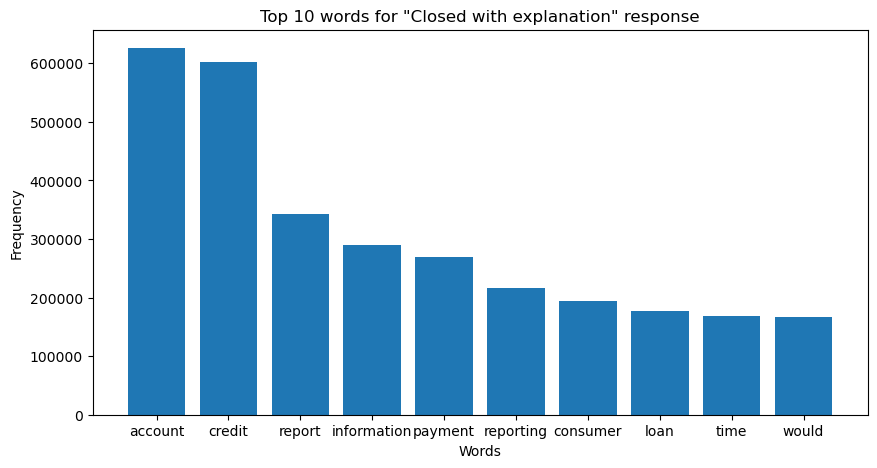

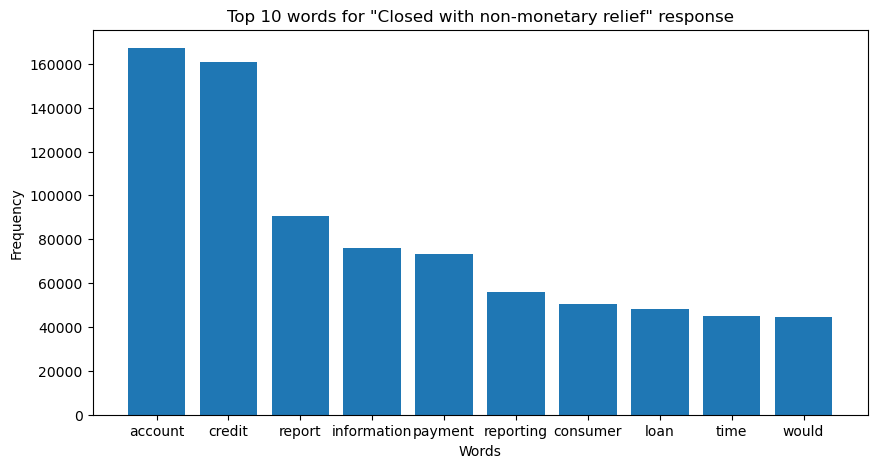

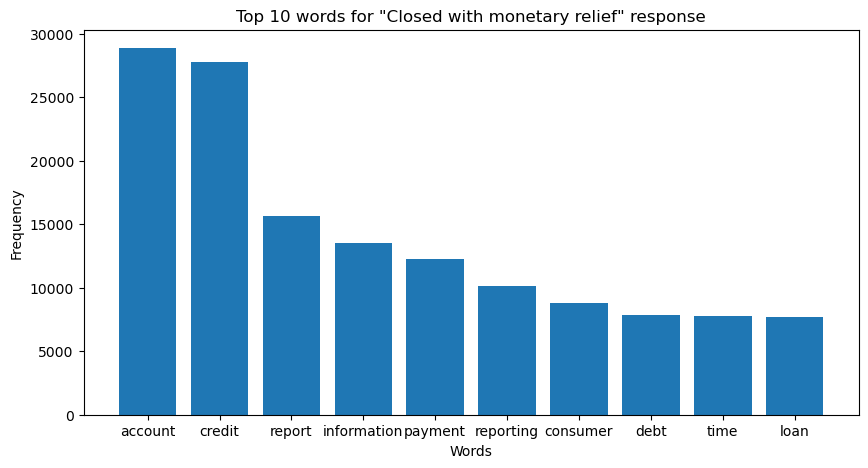

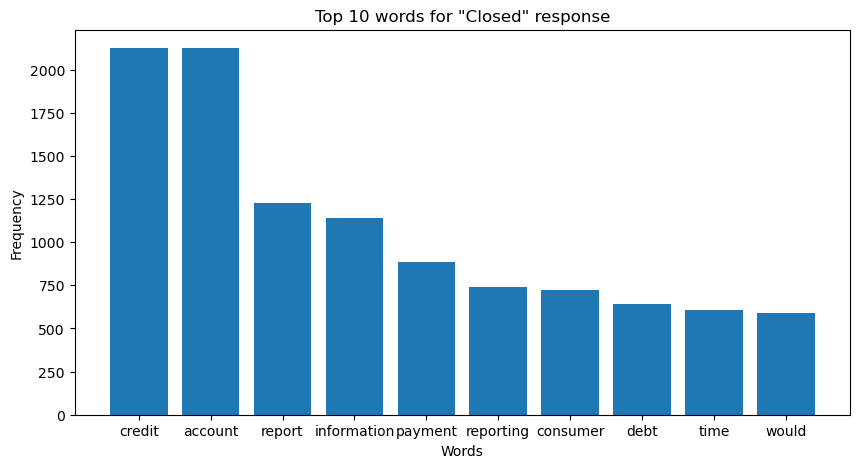

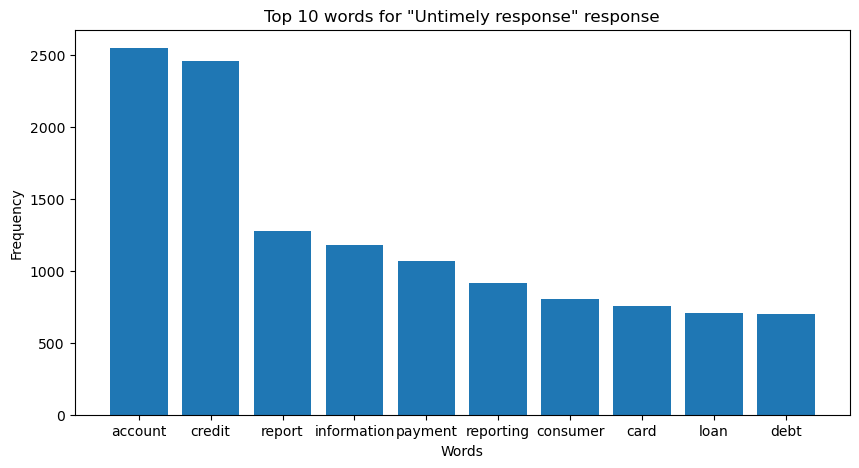

In [109]:
import matplotlib.pyplot as plt

# Get the unique response types
response_types = df_with_words['company_response_to_consumer'].unique()

# For each response type
for response in response_types:
    # Get the top 10 words
    top_words = word_counts_ones.loc[response].nlargest(10)
    
    # Create a bar plot
    plt.figure(figsize=(10, 5))
    plt.bar(top_words.index, top_words.values)
    plt.title(f'Top 10 words for "{response}" response')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

# Do specific words tend to receive specific responses? For example, do words related to fraud tend to receive more "closed with relief" responses compared to other issues?

# Or do specific responses are associated with specific words from the narrative?

In [79]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize a CountVectorizer (or TfidfVectorizer)
vectorizer = CountVectorizer(max_features=20000)

# Fit the vectorizer to the 'lemon' column and transform the column into a matrix
word_matrix = vectorizer.fit_transform(train['lemon'])

# Convert the sparse matrix to a DataFrame
word_df = pd.DataFrame.sparse.from_spmatrix(word_matrix, columns=vectorizer.get_feature_names_out())

In [80]:
# Convert the sparse matrix to a DataFrame
words_df = pd.DataFrame.sparse.from_spmatrix(word_matrix, columns=vectorizer.get_feature_names_out())

In [93]:
# words_df

In [82]:
# merge the word DataFrame with the 'company_response_to_consumer' column
df_with_words = words_df.merge(train['company_response_to_consumer'], left_index=True, right_index=True)

In [94]:
# df_with_words

In [ ]:
# sample_df = word_df.sample(frac=0.1)

In [234]:
# For each word, calculate the mean 'company_response_to_consumer'
word_means = df_with_words.groupby('company_response_to_consumer').mean()

In [85]:
word_means

,aa,aaa,aaccount,aadvantage,aafes,aag,aams,aan,aand,aargon,...,zion,zip,zipcode,zombie,zone,zoned,zoning,zoom,zuntafi,zwicker
company_response_to_consumer,,,,,,,,,,,,,,,,,,,,,
Closed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Closed with explanation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Closed with monetary relief,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Closed with non-monetary relief,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Untimely response,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# Filter out rows (axis=0) where all values are zero
word_means = word_means.loc[word_means.any(axis=1)]

In [87]:
# Filter out rows (axis=0) where all values are zero
word_means

,aa,aaa,aaccount,aadvantage,aafes,aag,aams,aan,aand,aargon,...,zion,zip,zipcode,zombie,zone,zoned,zoning,zoom,zuntafi,zwicker
company_response_to_consumer,,,,,,,,,,,,,,,,,,,,,
Closed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Closed with explanation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Closed with monetary relief,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Closed with non-monetary relief,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Untimely response,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# Filter out columns (axis=1) where all values are zero
word_means_ones = word_means.loc[:, word_means.any(axis=0)]

In [89]:
word_means_ones

,account,credit,report
company_response_to_consumer,,,
Closed,1,1,1
Closed with explanation,1,1,1
Closed with monetary relief,1,1,0
Closed with non-monetary relief,1,1,0
Untimely response,1,1,0


In [90]:
word_means_ones_v2 = word_means.loc[:, (word_means == 1).any(axis=0)]

In [91]:
word_means_ones_v2

,account,credit,report
company_response_to_consumer,,,
Closed,1,1,1
Closed with explanation,1,1,1
Closed with monetary relief,1,1,0
Closed with non-monetary relief,1,1,0
Untimely response,1,1,0


# Word analyze

In [127]:
train

,date_received,narrative,company_name,state,tags,company_response_to_consumer,product_bins,clean,lemon
943705,2020-03-10,I clicked on a link that was advertised as a f...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",UNKNOWN,Average Person,Closed with monetary relief,credit_report,i clicked on a link that was advertised as a f...,clicked link advertised free online credit rep...
575036,2020-12-31,After looking over my credit reports. I notice...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",OH,Average Person,Closed with explanation,credit_report,after looking over my credit reports i noticed...,looking credit report noticed fraudulent accou...
528231,2022-03-26,Sometime within the past year I applied for an...,"ENOVA INTERNATIONAL, INC.",NJ,Average Person,Closed with explanation,debt_collection,sometime within the past year i applied for an...,sometime within past year applied account netc...
753525,2015-12-11,"The debt was opened in error by the Provider, ...",Collection Management Company,PA,Average Person,Closed with explanation,debt_collection,the debt was opened in error by the provider w...,debt opened error provider knew opened error n...
1006881,2022-08-18,I have ( 2 ) loans with One Main Financial in ...,OneMain Finance Corporation,OH,Servicemember,Closed with explanation,loans,i have loans with one main financial in ohio i...,loan one main financial ohio paying loan sever...
...,...,...,...,...,...,...,...,...,...
320620,2022-02-05,I am writing to delete the following informati...,Experian Information Solutions Inc.,MI,Average Person,Closed with explanation,credit_report,i am writing to delete the following informati...,writing delete following information file item...
1099052,2020-12-03,There are unknown hard inquiries on my credit ...,ALLY FINANCIAL INC.,CA,Average Person,Closed with explanation,credit_report,there are unknown hard inquiries on my credit ...,unknown hard inquiry credit report im requeste...
874369,2015-07-22,I co-signed for my mother on an equity line wi...,WELLS FARGO & COMPANY,DC,Average Person,Closed with explanation,mortgage,i cosigned for my mother on an equity line wit...,cosigned mother equity line well fargo total b...
356621,2020-06-03,I have inquiries on my XXXX report that I don...,CREDIT ACCEPTANCE CORPORATION,AL,Average Person,Closed with explanation,credit_report,i have inquiries on my report that i dont reco...,inquiry report dont recognize tried calling co...


In [116]:
from pyspark.sql.functions import col, sum as spark_sum

# Choose a word to analyze
word = 'fraud'

# Create a new column that indicates whether the narrative contains the word
train_word = train.withColumn(word, when(array_contains(train['lemon'], word), 1).otherwise(0))

# Calculate the frequency of each response when the word is present
response_freq_when_word_present = train_word.filter(col(word) == 1).groupBy('company_response_to_consumer').count()

# Calculate the frequency of each response when the word is not present
response_freq_when_word_not_present = train_word.filter(col(word) == 0).groupBy('company_response_to_consumer').count()

# Calculate the total number of rows when the word is present and when it is not
total_when_word_present = train_word.filter(col(word) == 1).count()
total_when_word_not_present = train_word.filter(col(word) == 0).count()

# Convert the frequency counts to proportions
response_proportions_when_word_present = response_freq_when_word_present.withColumn('proportion', col('count') / total_when_word_present)
response_proportions_when_word_not_present = response_freq_when_word_not_present.withColumn('proportion', col('count') / total_when_word_not_present)

# Display the results
response_proportions_when_word_present.show()
response_proportions_when_word_not_present.show()


AttributeError: 'DataFrame' object has no attribute 'withColumn'

# Is there a relationship/bias for servicemember tags in relation to company response over the average person?

In [117]:
import pandas as pd
from scipy.stats import chi2_contingency

The p-value is a measure of the probability that an observed difference could have occurred just by random chance. The lower the p-value, the greater the statistical evidence you have to reject the null hypothesis (i.e., no effect or no difference).

A p-value of 0.0 (or an extremely small number close to zero) is telling you that the likelihood of the observed relationship (in this case, between 'tags' and 'company_response_to_consumer') occurring by chance is extremely low.

In other words, a p-value of 0.0 would provide strong evidence to reject the null hypothesis and conclude that there is a significant relationship between the 'tags' and 'company_response_to_consumer'.

In [118]:
# Create a cross-tabulation of the two variables
crosstab = pd.crosstab(train['tags'], train['company_response_to_consumer'],normalize='index')
crosstab

company_response_to_consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Untimely response
tags,,,,,
Average Person,0.002932,0.783232,0.038404,0.171969,0.003463
Older American,0.004845,0.799155,0.091530,0.100374,0.004097
"Older American, Servicemember",0.003958,0.818141,0.076227,0.098846,0.002827
Servicemember,0.002695,0.822556,0.036675,0.133577,0.004497


In [237]:
# Create a cross-tabulation of the two variables
crosstab = pd.crosstab(train['tags'], train['company_response_to_consumer'])
crosstab

company_response_to_consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Untimely response
tags,,,,,
Average Person,1877,501401,24585,110089,2217
Older American,149,24578,2815,3087,126
"Older American, Servicemember",35,7234,674,874,25
Servicemember,184,56160,2504,9120,307


In [238]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

# Print the p-value
print('p-value:', p)

p-value: 0.0


In [239]:
# Create a cross-tabulation of the two variables
crosstab_ser_meb = pd.crosstab(train[train['tags'].isin(['Average Person', 'Servicemember'])]['tags'], train['company_response_to_consumer'])
crosstab_ser_meb

company_response_to_consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Untimely response
tags,,,,,
Average Person,1877,501401,24585,110089,2217
Servicemember,184,56160,2504,9120,307


In [240]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab_ser_meb)

# Print the p-value
print('p-value:', p)

p-value: 3.530478982343501e-147


In [119]:
# Create a cross-tabulation of the two variables
crosstab_ser_meb = pd.crosstab(train[train['tags'].isin(['Average Person', 'Servicemember'])]['tags'], train['company_response_to_consumer'], normalize='index')
crosstab_ser_meb

company_response_to_consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Untimely response
tags,,,,,
Average Person,0.002932,0.783232,0.038404,0.171969,0.003463
Servicemember,0.002695,0.822556,0.036675,0.133577,0.004497


In [120]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab_ser_meb)

# Print the p-value
print('p-value:', p)

p-value: 0.9999955526953186


In [121]:
### Create a cross-tabulation of the two variables
crosstab_older_ame = pd.crosstab(train[train['tags'].isin(['Average Person', 'Older American'])]['tags'], train['company_response_to_consumer'], normalize='index')
crosstab_older_ame

company_response_to_consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Untimely response
tags,,,,,
Average Person,0.002932,0.783232,0.038404,0.171969,0.003463
Older American,0.004845,0.799155,0.091530,0.100374,0.004097


In [122]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab_older_ame)

# Print the p-value
print('p-value:', p)

p-value: 0.9997904442074834


In [123]:
# Create a cross-tabulation of the two variables
crosstab_oas = pd.crosstab(train[train['tags'].isin(['Average Person', 'Older American, Servicemember'])]['tags'], train['company_response_to_consumer'], normalize='index')
crosstab_oas

company_response_to_consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Untimely response
tags,,,,,
Average Person,0.002932,0.783232,0.038404,0.171969,0.003463
"Older American, Servicemember",0.003958,0.818141,0.076227,0.098846,0.002827


In [124]:
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab_oas)

# Print the p-value
print('p-value:', p)

p-value: 0.9998637217282046


the two variables are 'tags' and 'company_response_to_consumer'. The null hypothesis for this test is that there is no association between these two variables, meaning that the distribution of 'company_response_to_consumer' is the same for each category of 'tags'.



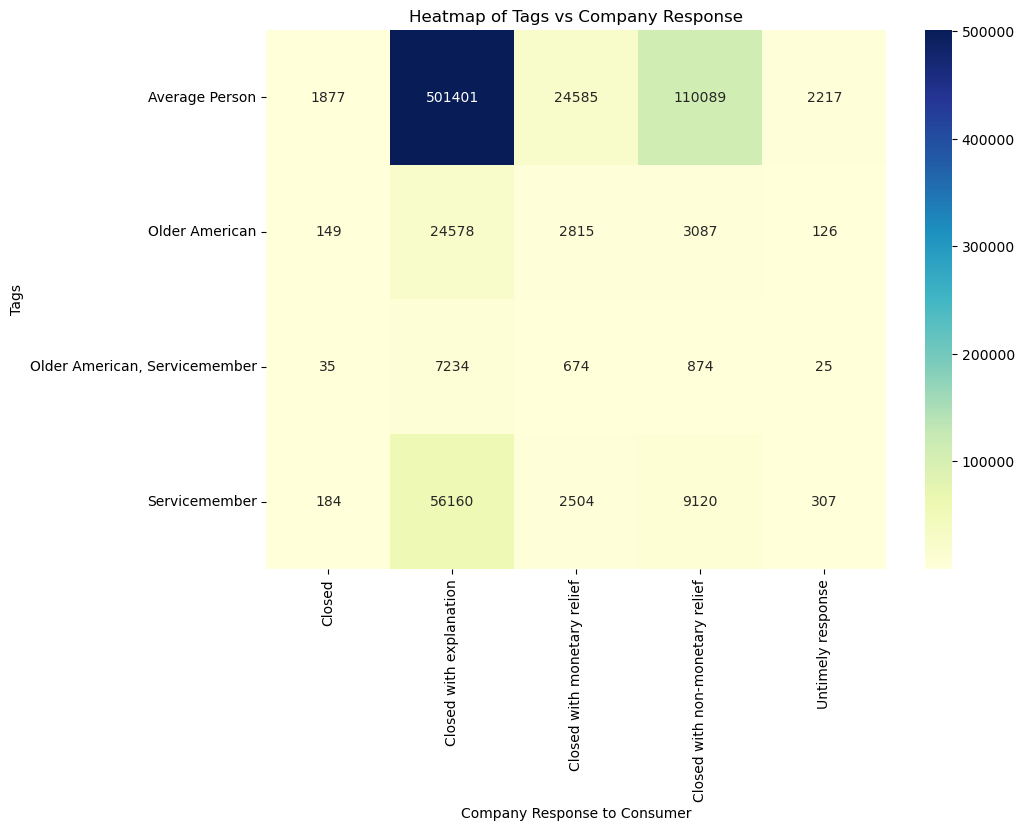

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation of the two variables
crosstab = pd.crosstab(train['tags'], train['company_response_to_consumer'])

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Heatmap of Tags vs Company Response')
plt.xlabel('Company Response to Consumer')
plt.ylabel('Tags')
plt.show()


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# # Replace None with '' (empty string)
# df_2['narrative'] = df_2['narrative'].fillna('')

# Apply the sentiment intensity analyzer to the 'narrative' column
train['sentiment'] = train['lemon'].apply(lambda complaint: sia.polarity_scores(complaint))

# Now each complaint has a sentiment score


In [ ]:
train['sentiment']

# Do some companies proportionally give better or worse responses (relief/no relief)?

In [218]:
df.company_public_response.value_counts()

Company has responded to the consumer and the CFPB and chooses not to provide a public response                            1321028
Company believes it acted appropriately as authorized by contract or law                                                    118220
Company chooses not to provide a public response                                                                             52473
Company believes the complaint is the result of a misunderstanding                                                           11653
Company disputes the facts presented in the complaint                                                                         9387
Company believes complaint caused principally by actions of third party outside the control or direction of the company       7178
Company believes complaint is the result of an isolated error                                                                 5737
Company believes complaint represents an opportunity for improvement to better serv

In [129]:
# Group by company and response type, and count the number of each response type for each company
response_counts = train.groupby(['company_name', 'company_response_to_consumer']).size().unstack(fill_value=0)

In [140]:
response_counts

company_response_to_consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Untimely response
company_name,,,,,
"(Former)Shapiro, Swertfeger & Hasty, LLP",0,0,0,0,2
"1 STOP MONEY CENTERS, LLC",0,4,2,0,0
"1803 Capital, LLC",0,2,0,0,0
1ST 2ND MORTGAGE CO. OF NJ INC,1,0,0,0,0
"1ST ALLIANCE LENDING, LLC",0,4,1,0,0
...,...,...,...,...,...
"iQuantified Management Services, LLC",0,7,0,1,0
"iReverse Home Loans, Corporation",0,0,0,1,0
"snapfi, inc.",0,1,0,0,0


In [130]:
# Calculate the total number of responses for each company
total_responses = response_counts.sum(axis=1)

In [170]:
total_responses

company_name
(Former)Shapiro, Swertfeger & Hasty, LLP    2
1 STOP MONEY CENTERS, LLC                   6
1803 Capital, LLC                           2
1ST 2ND MORTGAGE CO. OF NJ INC              1
1ST ALLIANCE LENDING, LLC                   5
                                           ..
iQuantified Management Services, LLC        8
iReverse Home Loans, Corporation            1
snapfi, inc.                                1
snw investments                             1
 Lippman Recupero, LLC                      1
Length: 4925, dtype: int64

In [131]:
# Divide the counts by the total number of responses to get the proportion of each response type for each company
response_proportions = response_counts.divide(total_responses, axis=0)

In [142]:
response_proportions

company_response_to_consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Untimely response
company_name,,,,,
"(Former)Shapiro, Swertfeger & Hasty, LLP",0.0,0.000000,0.000000,0.000,1.0
"1 STOP MONEY CENTERS, LLC",0.0,0.666667,0.333333,0.000,0.0
"1803 Capital, LLC",0.0,1.000000,0.000000,0.000,0.0
1ST 2ND MORTGAGE CO. OF NJ INC,1.0,0.000000,0.000000,0.000,0.0
"1ST ALLIANCE LENDING, LLC",0.0,0.800000,0.200000,0.000,0.0
...,...,...,...,...,...
"iQuantified Management Services, LLC",0.0,0.875000,0.000000,0.125,0.0
"iReverse Home Loans, Corporation",0.0,0.000000,0.000000,1.000,0.0
"snapfi, inc.",0.0,1.000000,0.000000,0.000,0.0


In [241]:
print(train['company_response_to_consumer'].unique())

['Closed with monetary relief' 'Closed with explanation'
 'Closed with non-monetary relief' 'Untimely response' 'Closed']


In [134]:
response_proportions['Closed with explanation'].nlargest(10)

company_name
1803 Capital, LLC                     1.0
1ST FINANCIAL, INC.                   1.0
1ST IBERIA CREDIT, INC.               1.0
1ST PREFERENCE MORTGAGE CORP          1.0
1st Capital Mortgage, LLC             1.0
1st Florida Lending CORP              1.0
1st Franklin Financial Corporation    1.0
21ST MORTGAGE CORP.                   1.0
360 Mortgage Inc.                     1.0
3D Financial, LP                      1.0
Name: Closed with explanation, dtype: float64

In [135]:
response_proportions['Closed with explanation'].nlargest(10)

company_name
1803 Capital, LLC                     1.0
1ST FINANCIAL, INC.                   1.0
1ST IBERIA CREDIT, INC.               1.0
1ST PREFERENCE MORTGAGE CORP          1.0
1st Capital Mortgage, LLC             1.0
1st Florida Lending CORP              1.0
1st Franklin Financial Corporation    1.0
21ST MORTGAGE CORP.                   1.0
360 Mortgage Inc.                     1.0
3D Financial, LP                      1.0
Name: Closed with explanation, dtype: float64

In [136]:
response_proportions['Closed with non-monetary relief'].nlargest(10)

company_name
60 Month Loans, Inc.                       1.0
A-M-S Mortgage Services, Inc.              1.0
AZ LENDING EXPERTS, LLC                    1.0
Advantage Recovery Group, Inc              1.0
American Credit - Credit Repair Centers    1.0
Andrews Law Firm, PLLC                     1.0
Apex Funding Group, Inc.                   1.0
Ashner Group Inc                           1.0
Assets Recovered, LLC                      1.0
Atlas Acquisitions LLC                     1.0
Name: Closed with non-monetary relief, dtype: float64

In [137]:
# Filter companies with more than 100 complaints
filtered_response_counts = response_counts[total_responses > 100]

In [143]:
filtered_response_counts

company_response_to_consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Untimely response
company_name,,,,,
21ST MORTGAGE CORP.,0,145,0,0,0
"ACIMA CREDIT, LLC",0,395,0,10,0
ACS Education Services,0,324,0,0,0
AES/PHEAA,0,3670,98,1052,0
AFNI INC.,1,1191,1,0,0
...,...,...,...,...,...
Winklevoss Exchange LLC,0,206,1,0,0
World Acceptance Corporation,1,367,0,0,0
World Omni Financial Corp.,0,167,3,15,0


In [148]:
# Recalculate the proportions
filtered_response_proportions = filtered_response_counts.divide(total_responses, axis=0)

In [150]:
filtered_response_proportions.head(15)

company_response_to_consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Untimely response
company_name,,,,,
"(Former)Shapiro, Swertfeger & Hasty, LLP",NaN,NaN,NaN,NaN,NaN
"1 STOP MONEY CENTERS, LLC",NaN,NaN,NaN,NaN,NaN
"1803 Capital, LLC",NaN,NaN,NaN,NaN,NaN
1ST 2ND MORTGAGE CO. OF NJ INC,NaN,NaN,NaN,NaN,NaN
"1ST ALLIANCE LENDING, LLC",NaN,NaN,NaN,NaN,NaN
"1ST FINANCIAL, INC.",NaN,NaN,NaN,NaN,NaN
"1ST IBERIA CREDIT, INC.",NaN,NaN,NaN,NaN,NaN
1ST PREFERENCE MORTGAGE CORP,NaN,NaN,NaN,NaN,NaN
"1st Capital Mortgage, LLC",NaN,NaN,NaN,NaN,NaN


In [139]:
# Get the top 10 companies for 'Closed with explanation'
filtered_response_proportions['Closed with explanation'].nlargest(10)

company_name
21ST MORTGAGE CORP.                    1.0
ACS Education Services                 1.0
AR Resources, Inc.                     1.0
AVANTE                                 1.0
AXOS FINANCIAL, INC.                   1.0
Army and Air Force Exchange Service    1.0
Asset Management Outsourcing, Inc.     1.0
BAM Management US Holdings Inc.        1.0
BMW Financial Services NA, LLC         1.0
BSI Financial Holdings, Inc.           1.0
Name: Closed with explanation, dtype: float64

In [152]:
# Filter companies with more than 100 complaints
filtered_response_counts = response_counts[total_responses > 100]

In [153]:
filtered_response_counts

company_response_to_consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Untimely response
company_name,,,,,
21ST MORTGAGE CORP.,0,145,0,0,0
"ACIMA CREDIT, LLC",0,395,0,10,0
ACS Education Services,0,324,0,0,0
AES/PHEAA,0,3670,98,1052,0
AFNI INC.,1,1191,1,0,0
...,...,...,...,...,...
Winklevoss Exchange LLC,0,206,1,0,0
World Acceptance Corporation,1,367,0,0,0
World Omni Financial Corp.,0,167,3,15,0


In [154]:
# Also filter total_responses
filtered_total_responses = total_responses[total_responses > 100]

In [168]:
filtered_total_responses['The Law Offices of Mitchell D. Bluhm & Associates']

180

In [156]:
# Recalculate the proportions
filtered_response_proportions = filtered_response_counts.divide(filtered_total_responses, axis=0)

In [157]:
filtered_response_proportions

company_response_to_consumer,Closed,Closed with explanation,Closed with monetary relief,Closed with non-monetary relief,Untimely response
company_name,,,,,
21ST MORTGAGE CORP.,0.000000,1.000000,0.000000,0.000000,0.0
"ACIMA CREDIT, LLC",0.000000,0.975309,0.000000,0.024691,0.0
ACS Education Services,0.000000,1.000000,0.000000,0.000000,0.0
AES/PHEAA,0.000000,0.761411,0.020332,0.218257,0.0
AFNI INC.,0.000838,0.998324,0.000838,0.000000,0.0
...,...,...,...,...,...
Winklevoss Exchange LLC,0.000000,0.995169,0.004831,0.000000,0.0
World Acceptance Corporation,0.002717,0.997283,0.000000,0.000000,0.0
World Omni Financial Corp.,0.000000,0.902703,0.016216,0.081081,0.0


In [158]:
# Get the top 10 companies for 'Closed with explanation'
filtered_response_proportions['Closed with explanation'].nlargest(10)

company_name
21ST MORTGAGE CORP.                    1.0
ACS Education Services                 1.0
AR Resources, Inc.                     1.0
AVANTE                                 1.0
AXOS FINANCIAL, INC.                   1.0
Army and Air Force Exchange Service    1.0
Asset Management Outsourcing, Inc.     1.0
BAM Management US Holdings Inc.        1.0
BMW Financial Services NA, LLC         1.0
BSI Financial Holdings, Inc.           1.0
Name: Closed with explanation, dtype: float64

In [166]:
# Get the top 10 companies for 'Closed with monetary relief'
filtered_response_proportions['Closed with monetary relief'].nlargest(10)

company_name
Blackhawk Network Holdings Inc.          0.465649
Empowerment Ventures, LLC                0.463687
Comerica                                 0.345912
AMERISAVE MORTGAGE CORPORATION           0.324649
FIRST NATIONAL BANK OF PENNSYLVANIA      0.316547
MUFG AMERICAS HOLDINGS CORPORATION       0.272727
WEBSTER BANK, NATIONAL ASSOCIATION       0.248322
BANK OF AMERICA, NATIONAL ASSOCIATION    0.240873
CHECK INTO CASH INC.                     0.215278
REGIONS FINANCIAL CORPORATION            0.215157
Name: Closed with monetary relief, dtype: float64

In [207]:
# Filter the response_proportions DataFrame for 'Blackhawk Network Holdings Inc.'
blackhawk_responses = response_proportions.loc['Blackhawk Network Holdings Inc.']

In [208]:
blackhawk_responses

company_response_to_consumer
Closed                             0.000000
Closed with explanation            0.530534
Closed with monetary relief        0.465649
Closed with non-monetary relief    0.003817
Untimely response                  0.000000
Name: Blackhawk Network Holdings Inc., dtype: float64

In [209]:
# Filter the response_counts DataFrame for 'Blackhawk Network Holdings Inc.'
blackhawk_counts = response_counts.loc['Blackhawk Network Holdings Inc.']
blackhawk_counts

company_response_to_consumer
Closed                               0
Closed with explanation            139
Closed with monetary relief        122
Closed with non-monetary relief      1
Untimely response                    0
Name: Blackhawk Network Holdings Inc., dtype: int64

In [231]:
# Filter the DataFrame for 'Blackhawk Network Holdings Inc.'
blackhawk_df = train[train['company_name'] == 'Blackhawk Network Holdings Inc.']

# Group by 'company_public_response' and count the number of complaints in each group
blackhawk_comments = blackhawk_df.groupby(df['company_public_response']).size()
blackhawk_comments

company_public_response
Company believes it acted appropriately as authorized by contract or law                            11
Company believes the complaint is the result of a misunderstanding                                   1
Company believes the complaint provided an opportunity to answer consumer's questions                1
Company chooses not to provide a public response                                                     1
Company has responded to the consumer and the CFPB and chooses not to provide a public response    150
dtype: int64

In [232]:
# Add 'company_public_response' to the train DataFrame
train['company_public_response'] = df['company_public_response']

In [233]:
# Group by 'company_public_response' and get all complaints in each group
blackhawk_comments = blackhawk_df.groupby('company_public_response')['lemon'].apply(list)

blackhawk_comments

company_public_response
Company believes it acted appropriately as authorized by contract or law                           [purchased play gift card totaling purchased f...
Company believes the complaint is the result of a misunderstanding                                 [vi disclose human contact number giftcardmall...
Company believes the complaint provided an opportunity to answer consumer's questions              [loaded cash reloadit pack one company offer r...
Company chooses not to provide a public response                                                   [filed dispute charge service never received i...
Company has responded to the consumer and the CFPB and chooses not to provide a public response    [purchased two mastercards california store ch...
Name: lemon, dtype: object

In [216]:
# Group by 'company_public_response' and get all complaints in each group
blackhawk_comments = blackhawk_df.groupby('company_response_to_consumer')['lemon'].apply(list)

# Print the result
print(blackhawk_comments)


company_response_to_consumer
Closed with explanation            [purchased two mastercards california store ch...
Closed with monetary relief        [purchased card kept issue using card turn som...
Closed with non-monetary relief    [gift card distributed blackhawk network calif...
Name: lemon, dtype: object


In [ ]:
# Filter the DataFrame for 'Blackhawk Network Holdings Inc.'
blackhawk_df = df[df['company_name'] == 'Blackhawk Network Holdings Inc.']

# Filter the DataFrame for rows where 'company_public_response' is not null
blackhawk_responses = blackhawk_df[blackhawk_df['company_response_to_consumer'].notna()]

# Print the result
print(blackhawk_responses)


In [167]:
# Get the top 10 companies for 'Closed with non-monetary relief'
filtered_response_proportions['Closed with non-monetary relief'].nlargest(10)

company_name
The Law Offices of Mitchell D. Bluhm & Associates    1.000000
Capio Partners, LLC                                  0.991071
Reliant Capital Solutions, LLC                       0.961905
Dynamic Recovery Solutions, LLC                      0.920886
V and H Portfolio                                    0.802083
The CMI Group, Inc.                                  0.689286
Credence Resource Management, LLC                    0.675159
MRS BPO, LLC                                         0.601227
Collection Bureau of the Hudson Valley, Inc.         0.594059
IQOR US INC                                          0.545064
Name: Closed with non-monetary relief, dtype: float64

In [159]:
# Define a function that categorizes each response
def categorize_response(response):
    if response in ['Closed with monetary relief', 'Closed with non-monetary relief']:
        return 'relief'
    else:
        return 'no relief'

# Apply the function to the 'company_response_to_consumer' column
train['response_category'] = train['company_response_to_consumer'].apply(categorize_response)

In [160]:
# Group by company and response category, and count the number of each category for each company
category_counts = train.groupby(['company_name', 'response_category']).size().unstack(fill_value=0)

In [161]:
category_counts

response_category,no relief,relief
company_name,,
"(Former)Shapiro, Swertfeger & Hasty, LLP",2,0
"1 STOP MONEY CENTERS, LLC",4,2
"1803 Capital, LLC",2,0
1ST 2ND MORTGAGE CO. OF NJ INC,1,0
"1ST ALLIANCE LENDING, LLC",4,1
...,...,...
"iQuantified Management Services, LLC",7,1
"iReverse Home Loans, Corporation",0,1
"snapfi, inc.",1,0


In [162]:
# Calculate the total number of responses for each company
total_responses = category_counts.sum(axis=1)

In [163]:
total_responses

company_name
(Former)Shapiro, Swertfeger & Hasty, LLP    2
1 STOP MONEY CENTERS, LLC                   6
1803 Capital, LLC                           2
1ST 2ND MORTGAGE CO. OF NJ INC              1
1ST ALLIANCE LENDING, LLC                   5
                                           ..
iQuantified Management Services, LLC        8
iReverse Home Loans, Corporation            1
snapfi, inc.                                1
snw investments                             1
 Lippman Recupero, LLC                      1
Length: 4925, dtype: int64

In [164]:
# Divide the counts by the total number of responses to get the proportion of each category for each company
category_proportions = category_counts.divide(total_responses, axis=0)

# Now, category_proportions is a DataFrame where each row corresponds to a company and each column corresponds to a response category.
# The values are the proportion of each category for each company.

In [165]:
category_proportions['relief'].nlargest(10)


company_name
360 Credit Consulting                      1.0
60 Month Loans, Inc.                       1.0
A-M-S Mortgage Services, Inc.              1.0
A1 Solutions Group Inc                     1.0
AZ LENDING EXPERTS, LLC                    1.0
Advantage Recovery Group, Inc              1.0
American Credit - Credit Repair Centers    1.0
American International Finance, Inc.       1.0
American Professional Collections          1.0
American Trst Company, Inc.                1.0
Name: relief, dtype: float64

In [ ]:
# Create a cross-tabulation of the two variables
crosstab_oas = pd.crosstab(train[train['tags'].isin(['Average Person', 'Older American, Servicemember'])]['tags'], train['company_response_to_consumer'], normalize='index')
crosstab_oas

# Another way of exploring specific companies that leave comments

In [171]:
sample_df = train.sample(frac=0.1)

In [199]:
# List of companies you're interested in
companies = ['Blackhawk Network Holdings Inc.', 'Empowerment Ventures, LLC', 'Comerica', 
             'AMERISAVE MORTGAGE CORPORATION', 'FIRST NATIONAL BANK OF PENNSYLVANIA', 
             'MUFG AMERICAS HOLDINGS CORPORATION', 'WEBSTER BANK, NATIONAL ASSOCIATION', 
             'BANK OF AMERICA, NATIONAL ASSOCIATION', 'CHECK INTO CASH INC.', 
             'REGIONS FINANCIAL CORPORATION']

# Filter the DataFrame
filtered_df = train[train['company_name'].isin(companies) & train['company_response_to_consumer'].notna()]

In [200]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')

In [201]:
# Fit the vectorizer to the 'company_public_response' column and transform the column into a matrix
word_matrix = vectorizer.fit_transform(filtered_df['company_response_to_consumer'])

In [202]:
# Convert the matrix into a DataFrame
word_df = pd.DataFrame(word_matrix.toarray(), columns=vectorizer.get_feature_names())

In [203]:
# Add the 'company_name' column to the word DataFrame
word_df['company_name'] = filtered_df['company_name'].values

In [204]:
# Group by company and calculate the mean of each word column
word_means = word_df.groupby('company_name').mean()

In [205]:
# Get the top 10 words for each company
top_words = word_means.T.apply(lambda x: x.nlargest(10).index.tolist())

In [206]:
top_words

company_name,AMERISAVE MORTGAGE CORPORATION,"BANK OF AMERICA, NATIONAL ASSOCIATION",Blackhawk Network Holdings Inc.,CHECK INTO CASH INC.,Comerica,"Empowerment Ventures, LLC",FIRST NATIONAL BANK OF PENNSYLVANIA,MUFG AMERICAS HOLDINGS CORPORATION,REGIONS FINANCIAL CORPORATION,"WEBSTER BANK, NATIONAL ASSOCIATION"
closed,closed,closed,closed,closed,closed,closed,closed,closed,closed,closed
explanation,explanation,explanation,explanation,explanation,explanation,monetary,explanation,monetary,explanation,explanation
monetary,monetary,monetary,monetary,monetary,monetary,relief,monetary,relief,monetary,monetary
non,relief,relief,relief,relief,relief,non,relief,explanation,relief,relief
relief,non,non,non,non,non,explanation,non,non,non,non
response,response,response,response,response,response,response,response,response,response,response
untimely,untimely,untimely,untimely,untimely,untimely,untimely,untimely,untimely,untimely,untimely


In [171]:
sample_df = train.sample(frac=0.1)

In [189]:
# List of companies you're interested in
companies = ['Blackhawk Network Holdings Inc.', 'Empowerment Ventures, LLC', 'Comerica', 
             'AMERISAVE MORTGAGE CORPORATION', 'FIRST NATIONAL BANK OF PENNSYLVANIA', 
             'MUFG AMERICAS HOLDINGS CORPORATION', 'WEBSTER BANK, NATIONAL ASSOCIATION', 
             'BANK OF AMERICA, NATIONAL ASSOCIATION', 'CHECK INTO CASH INC.', 
             'REGIONS FINANCIAL CORPORATION']

# Filter the DataFrame
filtered_df_2 = train[train['company_name'].isin(companies) & train['lemon'].notna()]

In [190]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer
vectorizer_2 = CountVectorizer(max_features=1000, stop_words='english')

In [191]:
# Fit the vectorizer to the 'lemon' column and transform the column into a matrix
word_matrix_2 = vectorizer.fit_transform(filtered_df_2['lemon'])

In [192]:
# Convert the matrix into a DataFrame
word_df_2 = pd.DataFrame(word_matrix_2.toarray(), columns=vectorizer.get_feature_names())

In [193]:
# Add the 'company_name' column to the word DataFrame
word_df_2['company_name'] = filtered_df_2['company_name'].values

In [194]:
# Group by company and calculate the mean of each word column
word_means_2 = word_df_2.groupby('company_name').mean()

In [195]:
# Get the top 10 words for each company
top_words_2 = word_means_2.T.apply(lambda x: x.nlargest(10).index.tolist())


In [196]:
top_words_2

company_name,AMERISAVE MORTGAGE CORPORATION,"BANK OF AMERICA, NATIONAL ASSOCIATION",Blackhawk Network Holdings Inc.,CHECK INTO CASH INC.,Comerica,"Empowerment Ventures, LLC",FIRST NATIONAL BANK OF PENNSYLVANIA,MUFG AMERICAS HOLDINGS CORPORATION,REGIONS FINANCIAL CORPORATION,"WEBSTER BANK, NATIONAL ASSOCIATION"
0,loan,bank,card,check,card,card,bank,bank,account,account
1,amerisave,account,gift,loan,account,money,account,union,region,bank
2,mortgage,america,told,cash,direct,account,fee,account,bank,transfer
3,rate,credit,called,credit,express,rushcard,national,credit,credit,time
4,company,card,number,account,bank,nt,loan,card,card,told
5,time,payment,day,company,money,day,payment,loan,fee,money
6,application,time,money,told,day,fund,told,payment,day,fee
7,credit,told,company,payment,told,access,day,called,told,fund
8,closing,money,received,debt,called,deposit,time,charge,payment,day
9,email,boa,time,said,charge,told,check,received,money,called
